In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 


# Initialize the non-slippery Frozen Lake environment
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
environment.reset()
environment.render()

# Initialize Q-table with zeros
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
qtable = np.zeros((16, 4))

# Alternatively, the gym library can also directly
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)


Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [3]:
# 1. Randomly choose an action using action_space.sample()
action = environment.action_space.sample()

# 2. Implement this action and move the agent in the desired direction
new_state, reward, done, truncated, info = environment.step(action)

# Display the results (reward and map)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.         0.59049    0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.07973437 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.6561     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.36703125 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.729      0.        ]
 [0.         0.81       0.         0.        ]
 [0.         0.75234375 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.9        0.        ]
 [0.         0.         1.         0.        ]
 [0.

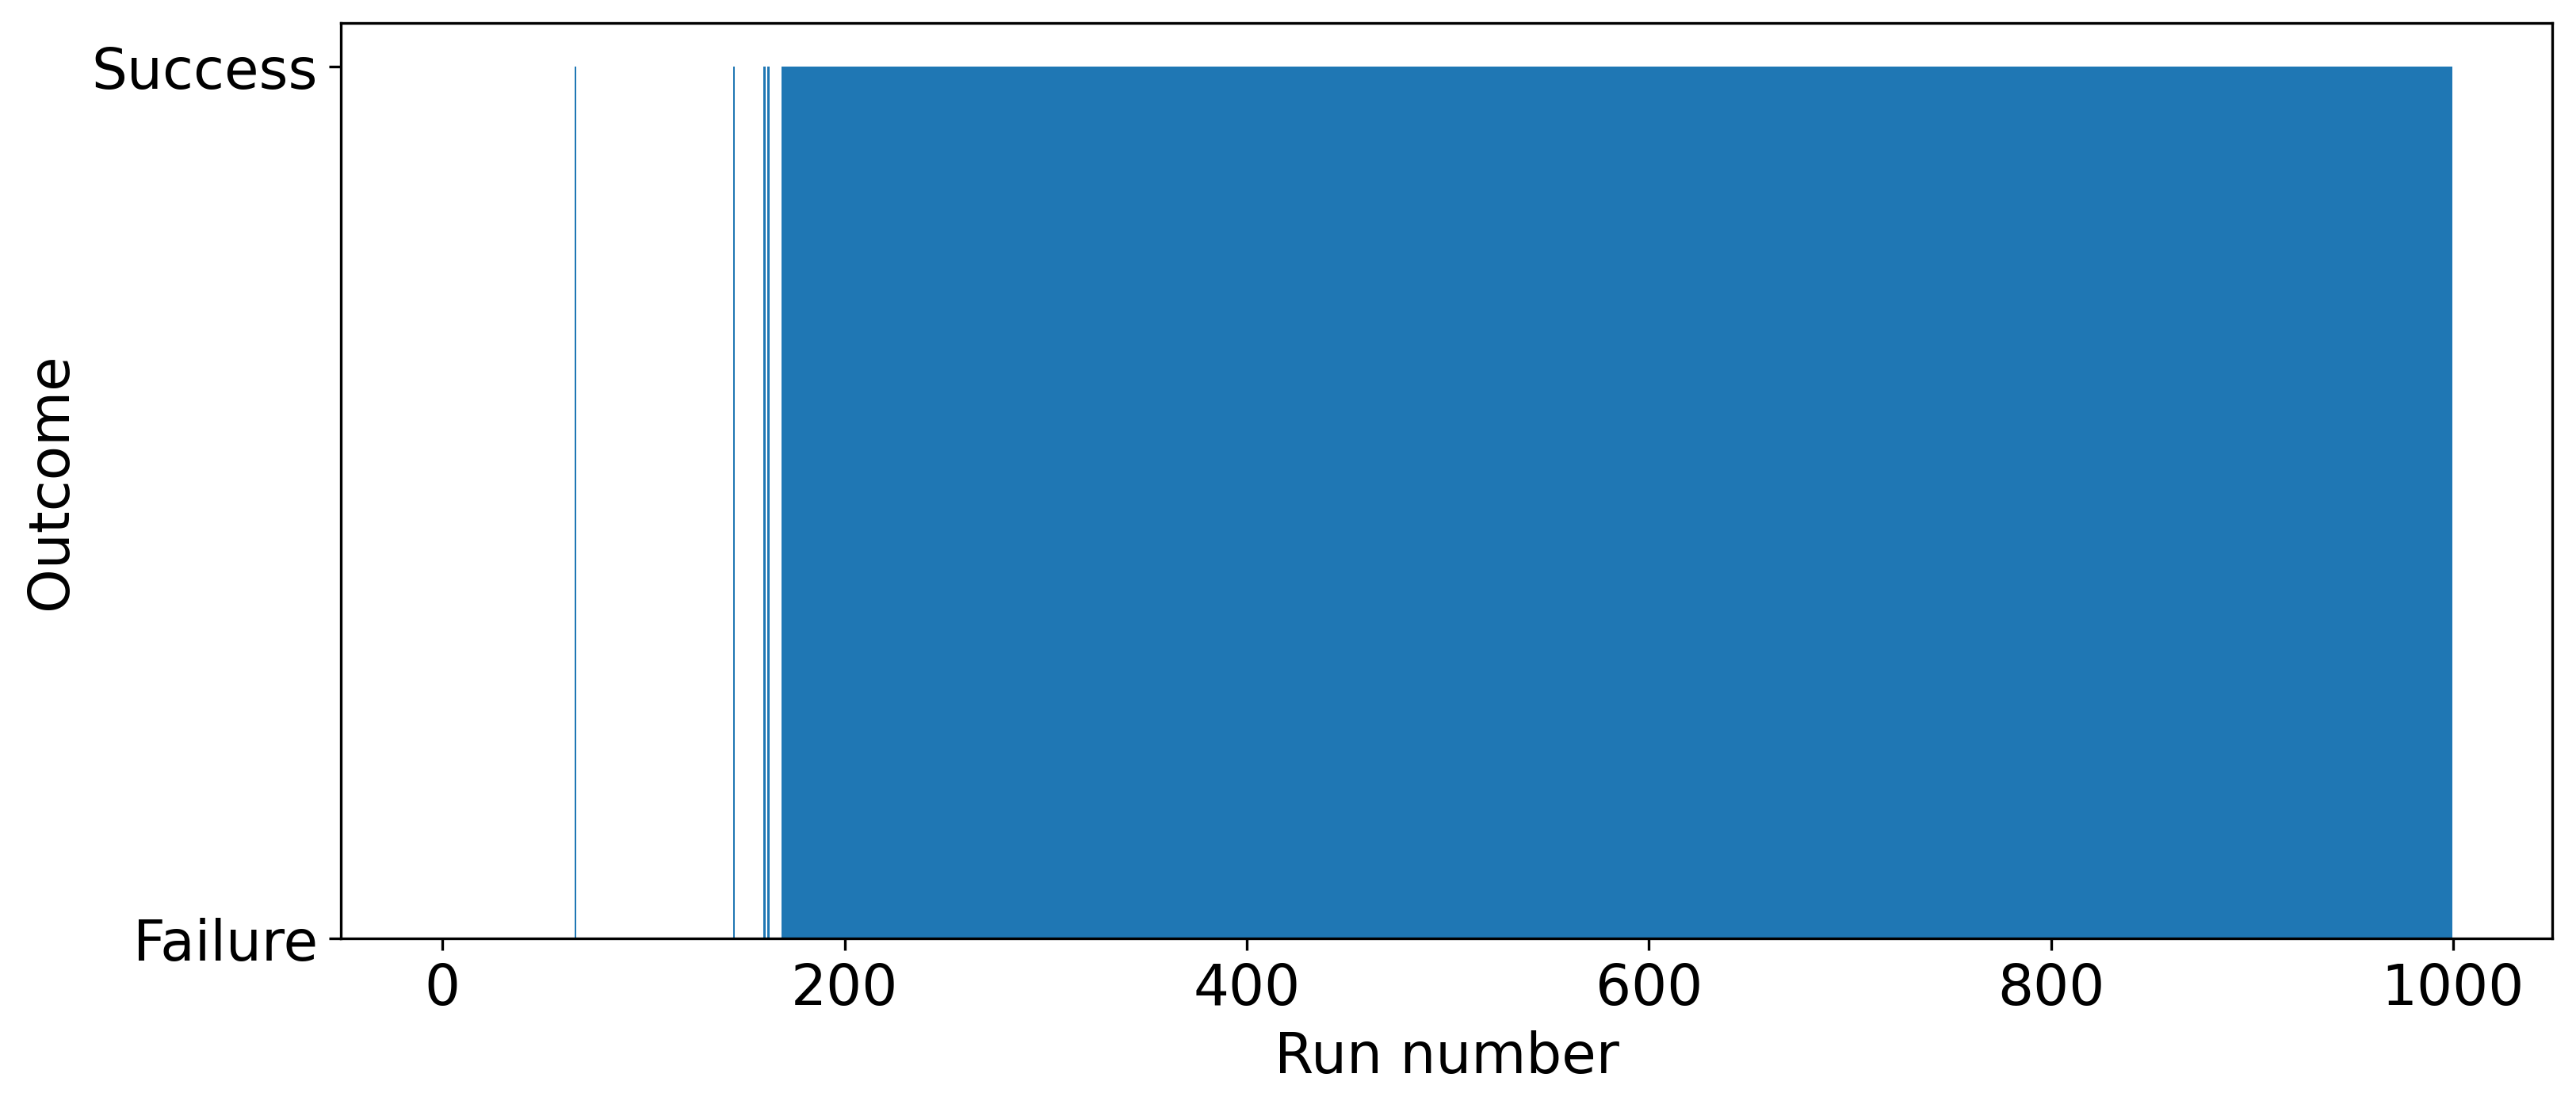

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()        
    
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)


        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - 
                                qtable[state, action])
             
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [5]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
          
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)
       
        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [6]:
state = environment.reset()
state = int(state[0])
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()
      
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, truncated, info = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [1, 1, 2, 1, 2, 2]
